In [1]:
from sympy import *
import sympy as sp
init_printing(use_unicode=True)

In [2]:
N = 1000
beta = 0.2
delta = 1/30
mu = 0.00136986
theta = 0.00136986
alpha = 1/7
kappa = 2.5/19
phi = 1
K = 1000
omega = 0.15

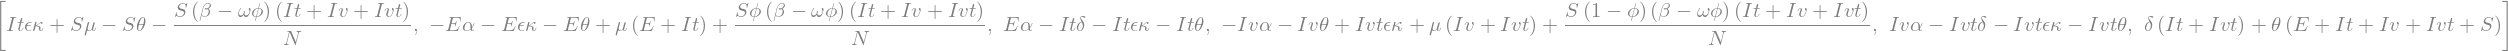

In [3]:
#defining symbols
S, E, It, Iv, Ivt, D = sp.symbols ('S E It Iv Ivt D')

#enforce that parameters are positive
N, beta, delta, mu, theta, alpha, kappa, phi, omega, epsilon = sp.symbols('N beta delta mu theta alpha kappa phi omega epsilon')

#define equations
dSdt = (mu * (S)) - ((beta - (phi*omega)) * S * (It + Iv + Ivt) / N) - (theta * S) + (kappa * epsilon * It)
dEdt = (mu * (E + It)) + ((beta - (phi*omega)) * S * (It + Iv + Ivt) / N * phi) - (alpha * E) - (theta * E) - (epsilon * kappa * E)
dItdt = (alpha * E) - (epsilon * kappa * It) - (delta * It) - (theta * It)
dIvdt = ((beta - (phi*omega)) * S * (It + Iv + Ivt) / N * (1-phi)) + (mu * (Iv + Ivt)) + (epsilon * kappa * Ivt) - (alpha * Iv) - (theta * Iv)
dIvtdt = (alpha * Iv) - (epsilon * kappa * Ivt) - (delta * Ivt) - (theta * Ivt)
dDdt = (theta * (S + E + It + Iv + Ivt)) + (delta * (It + Ivt))

#create a list of the equations
equations = [dSdt, dEdt, dItdt, dIvdt, dIvtdt, dDdt]
equations

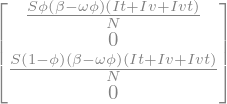

In [5]:
F1 = ((beta - (phi*omega)) * S * (It + Iv + Ivt) / N * phi)
F2 = 0
F3 = ((beta - (phi*omega)) * S * (It + Iv + Ivt) / N * (1-phi))
F4 = 0

new_infections = sp.Matrix([F1,F2,F3,F4])
new_infections

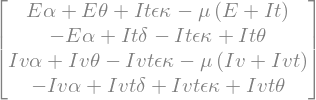

In [6]:
#define flow transition equations (reverse the symbols!)
V1 = - (mu * (E + It)) + (alpha * E) + (theta * E) + (epsilon * kappa * It)
V2 = - (alpha * E) - (epsilon * kappa * It) + (delta * It) + (theta * It)
V3 = - (mu * (Iv + Ivt)) - (epsilon * kappa * Ivt) + (alpha * Iv) + (theta * Iv)
V4 = - (alpha * Iv) + (epsilon * kappa * Ivt) + (delta * Ivt) + (theta * Ivt)

transition_equations = sp.Matrix([V1, V2, V3, V4])
transition_equations

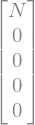

In [7]:
#define the disease-free equilibrium 

dfe = sp.Matrix([N,0,0,0,0])
dfe

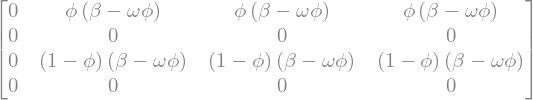

In [8]:
#make a jacobian matrix!
new_infections_jacobian = new_infections.jacobian([E, It, Iv, Ivt])
F = new_infections_jacobian.subs({S:dfe[0], E:dfe[1], It:dfe[2], Iv:dfe[3], Ivt:dfe[4]})
F

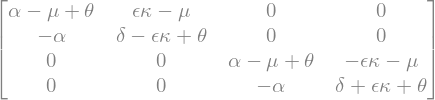

In [9]:
#doing the same for the transition equations
transition_equations_jacobian = transition_equations.jacobian([E, It, Iv, Ivt])
V = transition_equations_jacobian.subs({S:dfe[0], E:dfe[1], It:dfe[2], Iv:dfe[3], Ivt:dfe[4]})
V

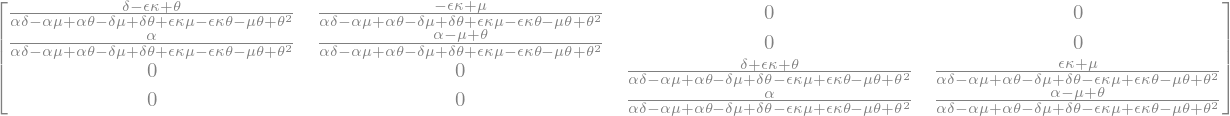

In [10]:
#find the inverse of V
V.inv()

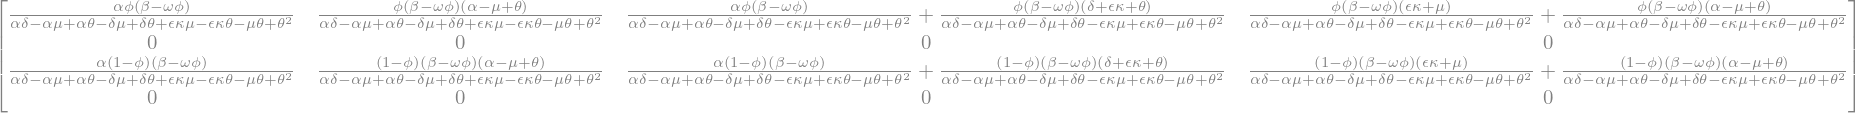

In [11]:
#we find the next-generation matrix by the product of F and the inverse of V
k = F*(V.inv())
k

(beta - omega*phi)*(alpha**2*delta - alpha**2*mu + alpha**2*theta - alpha*delta**2*phi + alpha*delta**2 - alpha*delta*epsilon*kappa*phi + alpha*delta*epsilon*kappa + alpha*delta*mu*phi - 2*alpha*delta*mu - 2*alpha*delta*phi*theta + 3*alpha*delta*theta - alpha*epsilon*kappa*mu*phi + alpha*epsilon*kappa*phi*theta + alpha*mu*phi*theta - 2*alpha*mu*theta - alpha*phi*theta**2 + 2*alpha*theta**2 + delta**2*mu*phi - delta**2*mu - delta**2*phi*theta + delta**2*theta + 2*delta*mu*phi*theta - 2*delta*mu*theta - 2*delta*phi*theta**2 + 2*delta*theta**2 - epsilon**2*kappa**2*mu*phi + epsilon**2*kappa**2*mu + epsilon**2*kappa**2*phi*theta - epsilon**2*kappa**2*theta + mu*phi*theta**2 - mu*theta**2 - phi*theta**3 + theta**3)/((alpha*delta - alpha*mu + alpha*theta - delta*mu + delta*theta - epsilon*kappa*mu + epsilon*kappa*theta - mu*theta + theta**2)*(alpha*delta - alpha*mu + alpha*theta - delta*mu + delta*theta + epsilon*kappa*mu - epsilon*kappa*theta - mu*theta + theta**2))


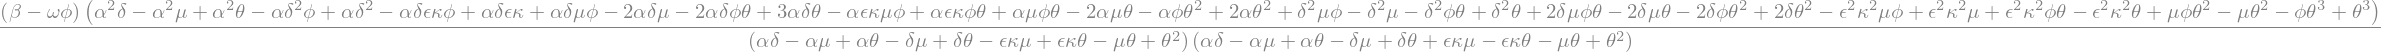

In [20]:
# The R0 value (by the next generation method) is the spectral radius of the next-generation
# matrix k. k is upper triangular, so the only non-zero eigenvalue is the upper-left entry:

eigenvalues=k.eigenvals()
r0 = None
for eigenvalue, multiplicity in eigenvalues.items():
    if simplify(eigenvalue) != 0: 
        r0 = eigenvalue
        break  
        
r0=r0.simplify()
r0
print (r0)
r0

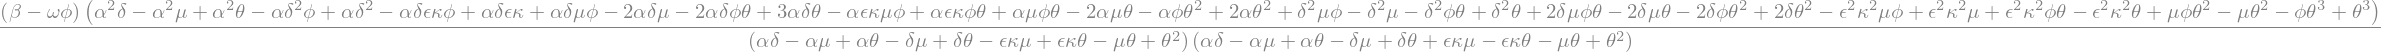

In [19]:
r0.factor()

In [25]:
latex(r0)
print(r"\( " + latex(r0) + r" \)")

\( \frac{\left(\beta - \omega \phi\right) \left(\alpha^{2} \delta - \alpha^{2} \mu + \alpha^{2} \theta - \alpha \delta^{2} \phi + \alpha \delta^{2} - \alpha \delta \epsilon \kappa \phi + \alpha \delta \epsilon \kappa + \alpha \delta \mu \phi - 2 \alpha \delta \mu - 2 \alpha \delta \phi \theta + 3 \alpha \delta \theta - \alpha \epsilon \kappa \mu \phi + \alpha \epsilon \kappa \phi \theta + \alpha \mu \phi \theta - 2 \alpha \mu \theta - \alpha \phi \theta^{2} + 2 \alpha \theta^{2} + \delta^{2} \mu \phi - \delta^{2} \mu - \delta^{2} \phi \theta + \delta^{2} \theta + 2 \delta \mu \phi \theta - 2 \delta \mu \theta - 2 \delta \phi \theta^{2} + 2 \delta \theta^{2} - \epsilon^{2} \kappa^{2} \mu \phi + \epsilon^{2} \kappa^{2} \mu + \epsilon^{2} \kappa^{2} \phi \theta - \epsilon^{2} \kappa^{2} \theta + \mu \phi \theta^{2} - \mu \theta^{2} - \phi \theta^{3} + \theta^{3}\right)}{\left(\alpha \delta - \alpha \mu + \alpha \theta - \delta \mu + \delta \theta - \epsilon \kappa \mu + \epsilon \kappa \t

In [15]:
def r0(N, alpha, beta, delta, kappa, omega, mu, theta, epsilon, phi): 
    return (beta - omega*phi)*(alpha**2*delta - alpha**2*mu + alpha**2*theta - alpha*delta**2*phi + alpha*delta**2 - alpha*delta*epsilon*kappa*phi + alpha*delta*epsilon*kappa + alpha*delta*mu*phi - 2*alpha*delta*mu - 2*alpha*delta*phi*theta + 3*alpha*delta*theta - alpha*epsilon*kappa*mu*phi + alpha*epsilon*kappa*phi*theta + alpha*mu*phi*theta - 2*alpha*mu*theta - alpha*phi*theta**2 + 2*alpha*theta**2 + delta**2*mu*phi - delta**2*mu - delta**2*phi*theta + delta**2*theta + 2*delta*mu*phi*theta - 2*delta*mu*theta - 2*delta*phi*theta**2 + 2*delta*theta**2 - epsilon**2*kappa**2*mu*phi + epsilon**2*kappa**2*mu + epsilon**2*kappa**2*phi*theta - epsilon**2*kappa**2*theta + mu*phi*theta**2 - mu*theta**2 - phi*theta**3 + theta**3)/((alpha*delta - alpha*mu + alpha*theta - delta*mu + delta*theta - epsilon*kappa*mu + epsilon*kappa*theta - mu*theta + theta**2)*(alpha*delta - alpha*mu + alpha*theta - delta*mu + delta*theta + epsilon*kappa*mu - epsilon*kappa*theta - mu*theta + theta**2))

In [16]:
r0 (1000, 1/6.33, 0.2, 1/23.67, 0, 0.15, 0.00136986, 0.00136986, 0, 1)